In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = bos
y = pd.DataFrame({'Target': boston.target})

In [5]:
# checking for Nan values in dataset
bos.isnull().sum().count

<bound method Series.count of CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64>

#### Independent features correalation with target feature

In [6]:
bos = pd.concat([X,y],axis=1)

In [7]:
bos[bos.columns[0:]].corr()['Target'][:]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Target     1.000000
Name: Target, dtype: float64

In [8]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


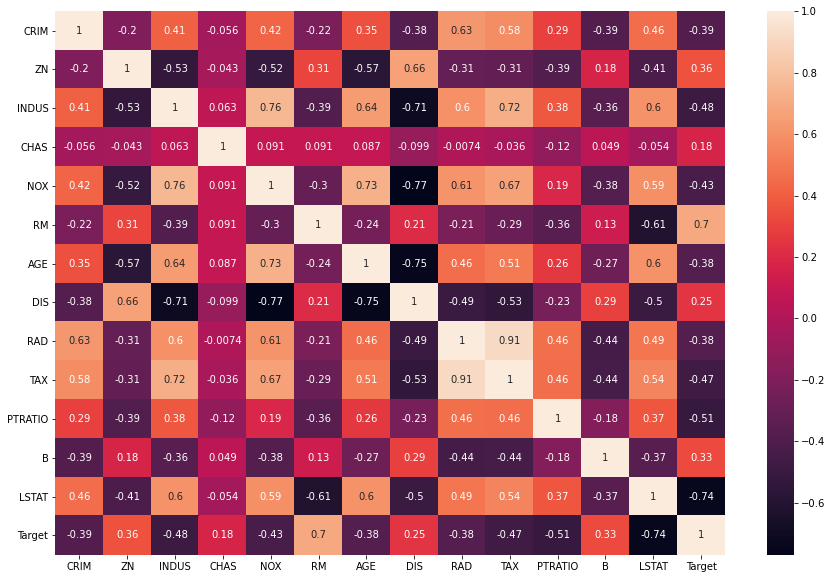

In [9]:
plt.figure(figsize=(15, 10))
snb.heatmap(bos.corr(), annot=True)
plt.show()

#### EDA

In [10]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

In [11]:
X.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [12]:
X.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
dtype: float64

#### The mean of data is greater than median, It suggest that our dataset has right side skeweness or positive skeweness.

In [13]:
for (columnName, columnData) in X.iteritems():
    print(str(columnName) +" skewness value = "+ str(skew(columnData)))

CRIM skewness value = 5.207652387859715
ZN skewness value = 2.219063057148425
INDUS skewness value = 0.29414627684418543
CHAS skewness value = 3.395799292642519
NOX skewness value = 0.7271441597740319
RM skewness value = 0.40241466802496245
AGE skewness value = -0.5971855948016143
DIS skewness value = 1.0087787565152246
RAD skewness value = 1.0018334924536951
TAX skewness value = 0.6679682687237768
PTRATIO skewness value = -0.7999445320367449
B skewness value = -2.8817983452627716
LSTAT skewness value = 0.9037707431346133


skewness 5.207652387859715


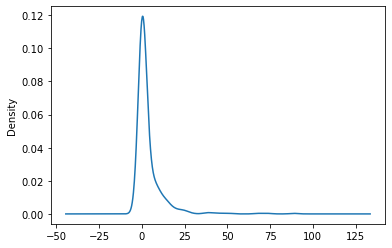

In [14]:
print('skewness',skew(X['CRIM']))
X['CRIM'].plot.kde()

skewness 2.219063057148425


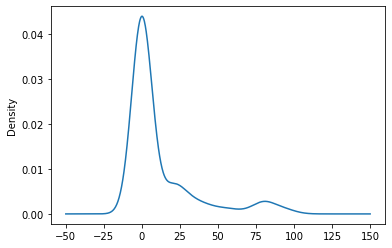

In [15]:
print('skewness',skew(X['ZN']))
X['ZN'].plot.kde()

skewness 3.395799292642519


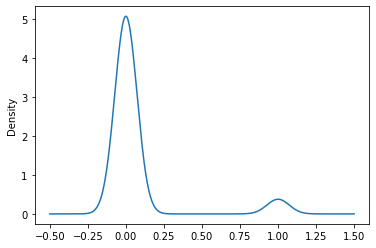

In [16]:
print('skewness',skew(X['CHAS']))
X['CHAS'].plot.kde()

#### The above observation states that, feature CRIM, ZN, CHAS  have higher skewness values

#### Removing the skewness using log transform

skewness 0.40473014342603986


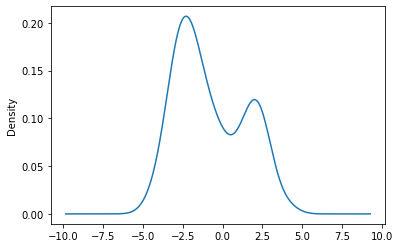

In [17]:
X['CRIM'] = np.log(X['CRIM'])
print('skewness',skew(X['CRIM']))
X['CRIM'].plot.kde()

#### If data contains negative values then, by applying the log transform it convert to Nan values, To avoid this we will apply square root transform 

skewness 1.4719128590626676


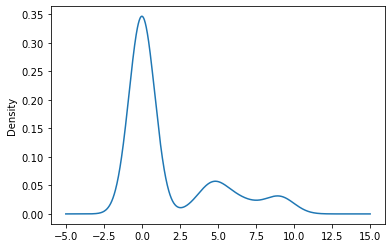

In [18]:
X['ZN'] = np.sqrt(X['ZN'])
print('skewness',skew(X['ZN']))
X['ZN'].plot.kde()

skewness 3.395799292642519


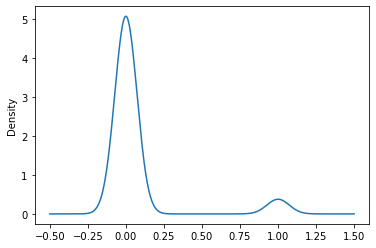

In [19]:
X['CHAS'] = np.sqrt(X['CHAS'])
print('skewness',skew(X['CHAS']))
X['CHAS'].plot.kde()

#### Feature Selection Techniques 

In [20]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#### 1.Backward Elimination using OLS model 

In [21]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('best features', selected_features_BE)

best features ['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


#### 2.Lasso regularization

In [22]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.694362


C:\Users\RAHUL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

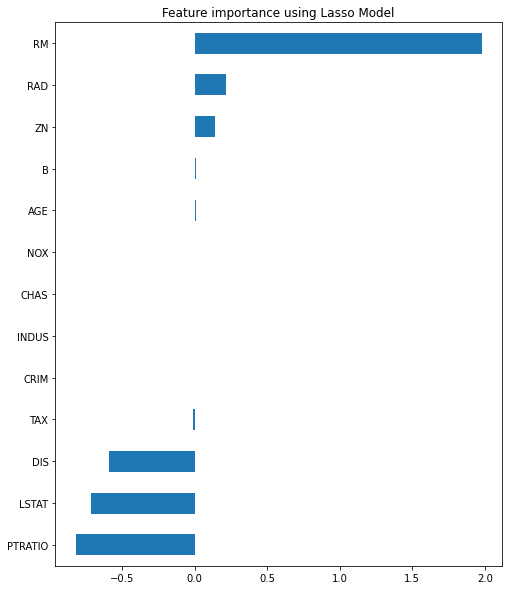

In [24]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#### Finalizing the features according to observations

In [25]:
X = X[['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [26]:
X.head()

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,4.242641,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.000000,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.000000,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.000000,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.000000,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


#### Model Creation 

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
r2_score(y_test, y_pred)

0.7249076113075876

In [36]:
# calculate MAE, MSE, RMSE
from sklearn import metrics

print("MAE - ",metrics.mean_absolute_error(y_test, y_pred))
print("MSE - ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE -",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE -  3.1268832133505127
MSE -  20.818581640863314
RMSE - 4.562738392770652
